# Problem statement:

I found a dataset which contains all the prescriptions across various practices thorughout Britain. 
My plan was to identify certain trends like how prescribing certain drugs in maximum number, marks the onset of a certain season. This inturn helps the pharmaceutical industry to manufacture drugs accordingly. 





# Data Description

For each month there are three files:


Practice Prescribing Data file - this is the main data file giving the practice level prescribing data at presentation level.


GP prescribing chemical substance file - this gives the chemical substance or section as appropriate using the 9 digit (Drugs) or 4 digit (Appliances) BNF code.


GP prescribing practice address file - this gives the practice name and address.
These are the screenshots of the data.


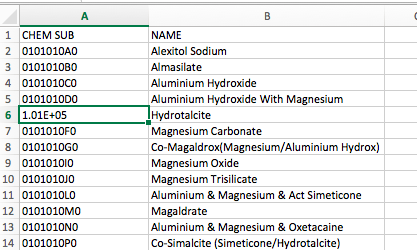

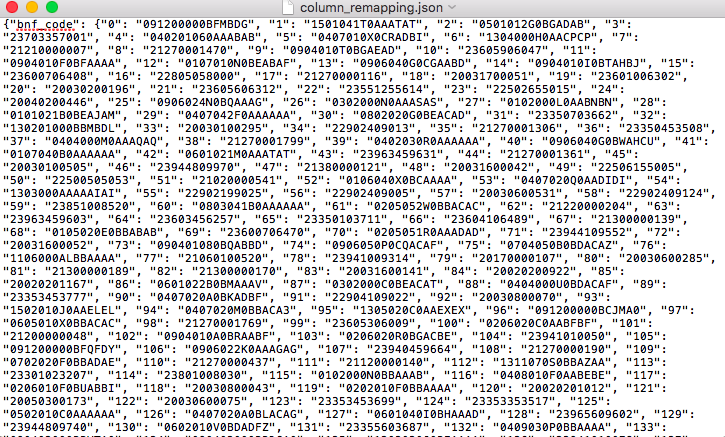

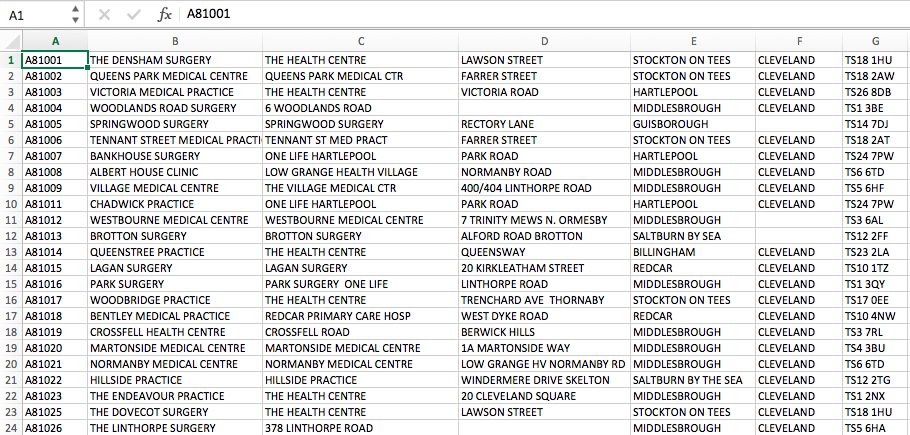

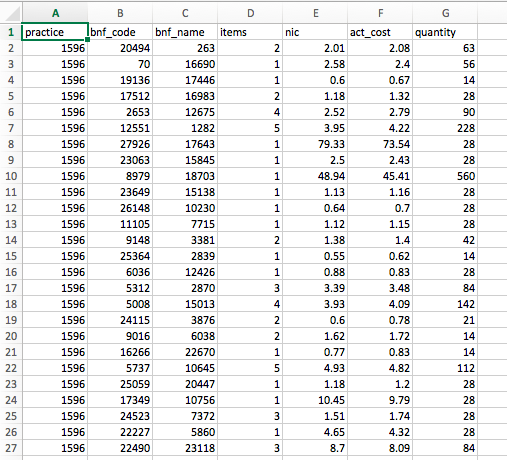

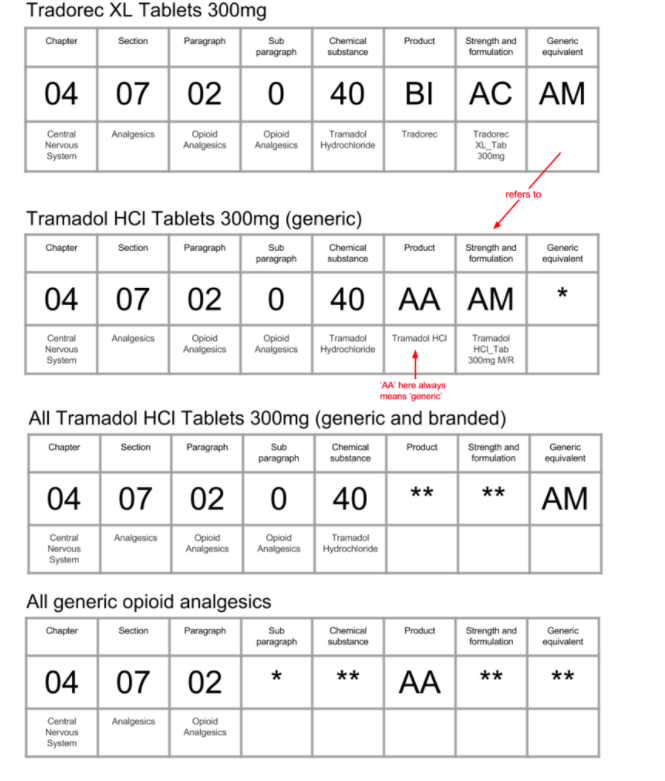

# Initial approach

I tried to solve this problem by brute force initially. My plan was if I group by the bnf_codes in each monthly file, I could find the count of each drug and out of those I will be able to find the maximum quantity which will be my most prescribed drug in that month.

I tried that and for a particular month I found that the drug that is prescribed the most number of times was tomato soup. So I figured out that this was not a correct approach.

Even if I found all the details of all the drugs that are prescribed for a particular month, Frequency is very vague to be considered a key factor in estimating the season.



# Data Cleanup

The British National Formulary (BNF) is a reference book containing the standard list of medicines used in UK prescribing. It gives information on the indications, dosages and side effects for over 70,000 medicines. The BNF used to show medicines in a hierarchy, and the NHS Business Services Authority use a legacy version of the BNF hierarchy to assign codes to drugs and chemicals. You can find out more about how they assign codes here.

The BNF codes from this pseudo-classification are used in the prescribing dataset as a unique identifier to show what was prescribed. These BNF codes can tell you a lot about a drug or appliance. The codes are in a hierarchy:

The first characters tell you which part of the BNF a drug is from. For example, drugs in BNF Chapter 4 (Central Nervous System) will always begin with ’04’. The BNF is then further subdivided into sections. For example, Antidepressant Drugs, which are contained within Chapter 4 Section 3 of the BNF, all begin with ‘0403’
The last few characters of the BNF code give more detailed information about a drug. It tells you what the drug is, it tells you whether the product is generic or branded, and it tells you more about the presentation of the drug (e.g. whether it is a capsule or tablet, and what the strength of the drug is)

Analysis with these huge amounts of drugs become difficult. So, I tried to reduce the drugs size by eliminating those which meet certain criteria. 

For example, those that start with 19-23 are the ones which deals with surgery appliances and medical equipment. These are of no use in predicting a season. There are no chapters 16,17 and 18. Those that start with them are just psuedonyms given by the british council. I eliminated them as well.

I stripped down the bnf_codes to 2,4 and 6 digits in various monthly files. I am not sure as to which will be useful. So, I tried all the three possibilities.

# Alternative

BNF-code: Altenative

So, If in a month maximum number of drugs are prescribed that treats certain areas like say central nervous system, we can analyse that diseases related to CNS are mostly prevelant in that month when compared to other months.

This inturn can help the pharmaceutical industry to produce drugs related to a specific part of the body based on the months.


In [1]:
import os
os.chdir('/Users/sampathkumar/Desktop')

In [2]:
import pandas as pd
bnfdf= pd.read_csv('may_test.csv',converters={'original_bnf_code': lambda x: str(x)})
bnfdf.head()

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,original_bnf_code
0,5668,8092,592,2,44.10,40.84,189,0703010F0BLAAAJ
1,1596,17512,16983,2,1.64,1.64,35,0401010Z0AAAAAA
2,1596,25587,16124,1,1.26,1.28,42,0401020K0AAAHAH
3,1596,12551,1282,2,0.86,1.02,42,0402010ABAAABAB
4,1596,18938,10575,1,1.85,1.82,56,0402010ABAAACAC


In [59]:
r1 = bnfdf.groupby('original_bnf_code')['quantity'].sum().reset_index()
r1.columns=['original_bnf_code', 'quantity']
r1.head()

,original_bnf_code,quantity
0,0101010C0AAAAAA,21673
1,0101010C0BBAAAA,35838
2,0101010F0AAAUAU,3096
3,0101010F0BCAAAU,90
4,0101010G0AAABAB,1544432


In [5]:
r1.to_csv('test2.csv', encoding='utf-8')

In [52]:
m2 =  pd.read_csv('feb_test.csv',converters={'stripped_bnf_code': lambda x: str(x)})
m3 = m2.groupby('result')['quantity'].sum().reset_index()
m3.to_csv('m3_result.csv', encoding='utf-8')


In [56]:
df = pd.read_csv('m3_result.csv')
del df['Unnamed: 0']
df

,result,quantity
0,1,644733676
1,2,868634552
2,3,116985405
3,4,1146484938
4,5,138641798
5,6,420566761
6,7,104827848
7,8,14480280
8,9,2136464327
9,10,169772957


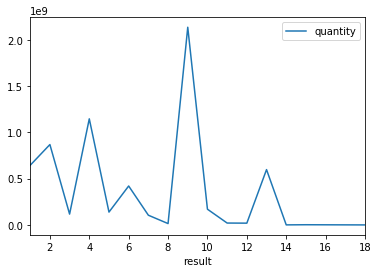

In [57]:
from matplotlib.pyplot import hist
df.plot(x='result', y='quantity')
plt.show()

# Algorithms

# Decision Tree algorithms

I wanted to implement the decision tree the DT algorithm initially. It would have been very efficient in predicting the season given the drug name and we had an idea of the frequency of the drugs. Now I just get the are of the body that gets mostly affected in a particular month. This is way too generic to forecast the season. So I decided not to use this algorithm

# Clustering algorithms

I think I used the idea of clustering when I grouped the drugs which have the similar BNF codes, although It does not come under a particular kind of clustering. 